In [1]:
from google.colab import drive 
import os

!ls /content/

drive.mount('/content/drive')
#drive.flush_and_unmount()

#print('Nội dung thư mục /content/ : nếu có drive là mount OK')
!ls /content/
print('Thư mục working:')
os.chdir("/content/drive/MyDrive/Colab Notebooks/CoLab-Convnet")
!pwd
!ls

sample_data
Mounted at /content/drive
drive  sample_data
Thư mục working:
/content/drive/MyDrive/Colab Notebooks/CoLab-Convnet
20211215_110954_loss-dcgan-d-g.txt  first-gan.ipynb	 output
20211215_150242_loss-dcgan-d-g.txt  loss-dcgan-stat.txt  train-dcgan.ipynb
20211215_150404_loss-dcgan-d-g.txt  loss-stat.txt	 train-patchgan.ipynb
20211215_152623_loss-dcgan-d-g.txt  MNIST		 train-sketch.ipynb
dataset				    model


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import BCELoss
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from tqdm.auto import tqdm

from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

from datetime import datetime
import time

from model.sketch_patchgan import Generator
from model.sketch_patchgan import Discriminator

In [3]:
def display_time(offset=0):
    now = datetime.now()
    h = now.hour + offset # chuyển sang giờ Việt Nam
    date_time = now.strftime("%Y%m%d_{:02d}%M%S".format(h))
    return date_time

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

lr = 0.0002
BATCH_SIZE = 1
EPOCHS = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

gen = Generator()
#gen = torch.load('./output/20211213_112621_L1.SGD_0.0139.pth')
gen.apply(weights_init)
gen.to(device)

disc = Discriminator()
disc.apply(weights_init)
disc.to(device)

genOpt = Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
discOpt = Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))

adv_criterion = nn.BCEWithLogitsLoss() 
recon_criterion = nn.L1Loss() 
lambda_recon = 100

cuda


In [4]:
def get_gen_loss(gen, disc, real, condition, adv_criterion, recon_criterion, lambda_recon):
    fake_img = gen(condition)
    disc_fake_hat = disc(fake_img, condition)
    gen_adv_loss = adv_criterion(disc_fake_hat, torch.ones_like(disc_fake_hat))
    gen_rec_loss = recon_criterion(real, fake_img)
    gen_loss = gen_adv_loss + lambda_recon * gen_rec_loss
    return gen_loss

Length train: 84
BATCH_SIZE 1
trainSteps: 84

Begin trainning ...

[INFO] EPOCH: 1/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183118 Epoch 1/50, discriminator loss: 0.19223482232163883, generator loss: 11.443943097477867
[INFO] EPOCH: 2/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183154 Epoch 2/50, discriminator loss: 0.32869360033267486, generator loss: 11.13436165877751
[INFO] EPOCH: 3/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183230 Epoch 3/50, discriminator loss: 0.21295946511894553, generator loss: 11.315099171229772
[INFO] EPOCH: 4/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183307 Epoch 4/50, discriminator loss: 0.2550175151499432, generator loss: 11.616540534155709
[INFO] EPOCH: 5/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183343 Epoch 5/50, discriminator loss: 0.2891332721642573, generator loss: 10.90896305016109
[INFO] EPOCH: 6/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183419 Epoch 6/50, discriminator loss: 0.13047996456623964, generator loss: 11.48283436752501
[INFO] EPOCH: 7/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183455 Epoch 7/50, discriminator loss: 0.2953411500313364, generator loss: 11.783603520620437
[INFO] EPOCH: 8/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183531 Epoch 8/50, discriminator loss: 0.3349199759153028, generator loss: 10.897516318729945
[INFO] EPOCH: 9/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183608 Epoch 9/50, discriminator loss: 0.28042347511897486, generator loss: 10.518240071478344
[INFO] EPOCH: 10/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183644 Epoch 10/50, discriminator loss: 0.25758185024772373, generator loss: 10.65110106695266
[INFO] EPOCH: 11/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183720 Epoch 11/50, discriminator loss: 0.3621510474587835, generator loss: 10.095807966731844
[INFO] EPOCH: 12/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183756 Epoch 12/50, discriminator loss: 0.3034502809168771, generator loss: 10.51509119783129
[INFO] EPOCH: 13/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183832 Epoch 13/50, discriminator loss: 0.27271223560507807, generator loss: 10.047791804586138
[INFO] EPOCH: 14/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183909 Epoch 14/50, discriminator loss: 0.2764852334789577, generator loss: 10.612936564854213
[INFO] EPOCH: 15/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_183945 Epoch 15/50, discriminator loss: 0.2945197841535056, generator loss: 10.173323818615504
[INFO] EPOCH: 16/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184021 Epoch 16/50, discriminator loss: 0.37676330505027655, generator loss: 10.26515593415215
[INFO] EPOCH: 17/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184057 Epoch 17/50, discriminator loss: 0.2762285588153948, generator loss: 9.912456364858718
[INFO] EPOCH: 18/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184133 Epoch 18/50, discriminator loss: 0.39246080973229946, generator loss: 9.642948956716628
[INFO] EPOCH: 19/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184210 Epoch 19/50, discriminator loss: 0.36648755672476474, generator loss: 9.653147862071084
[INFO] EPOCH: 20/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184246 Epoch 20/50, discriminator loss: 0.2850000489547494, generator loss: 9.480332380249386
[INFO] EPOCH: 21/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184322 Epoch 21/50, discriminator loss: 0.2820135006082377, generator loss: 9.885391893840971
[INFO] EPOCH: 22/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184358 Epoch 22/50, discriminator loss: 0.20925939715068256, generator loss: 11.067916205951146
[INFO] EPOCH: 23/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184435 Epoch 23/50, discriminator loss: 0.30755724551688346, generator loss: 10.345320190702166
[INFO] EPOCH: 24/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184511 Epoch 24/50, discriminator loss: 0.3781544761288734, generator loss: 9.793387231372652
[INFO] EPOCH: 25/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184547 Epoch 25/50, discriminator loss: 0.2843353621484268, generator loss: 9.504793144407726
[INFO] EPOCH: 26/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184623 Epoch 26/50, discriminator loss: 0.2796809120114804, generator loss: 9.752661029497782
[INFO] EPOCH: 27/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184700 Epoch 27/50, discriminator loss: 0.33875908939877436, generator loss: 9.306862734612965
[INFO] EPOCH: 28/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184736 Epoch 28/50, discriminator loss: 0.3848002246980156, generator loss: 9.400180654866356
[INFO] EPOCH: 29/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184812 Epoch 29/50, discriminator loss: 0.43655001203573884, generator loss: 8.945628535179864
[INFO] EPOCH: 30/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184849 Epoch 30/50, discriminator loss: 0.3233297861159025, generator loss: 8.863341674918221
[INFO] EPOCH: 31/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_184925 Epoch 31/50, discriminator loss: 0.36201134202669244, generator loss: 8.942819754282633
[INFO] EPOCH: 32/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185001 Epoch 32/50, discriminator loss: 0.38406229954922483, generator loss: 9.018518779958997
[INFO] EPOCH: 33/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185038 Epoch 33/50, discriminator loss: 0.33160105624812697, generator loss: 9.120030346370879
[INFO] EPOCH: 34/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185114 Epoch 34/50, discriminator loss: 0.3772100021264383, generator loss: 8.517262986728124
[INFO] EPOCH: 35/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185150 Epoch 35/50, discriminator loss: 0.35922359924076036, generator loss: 8.837911639894758
[INFO] EPOCH: 36/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185227 Epoch 36/50, discriminator loss: 0.29728401898007306, generator loss: 9.330725119227456
[INFO] EPOCH: 37/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185303 Epoch 37/50, discriminator loss: 0.2921776342693539, generator loss: 9.179105534439994
[INFO] EPOCH: 38/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185339 Epoch 38/50, discriminator loss: 0.4072240965795659, generator loss: 8.657664690698896
[INFO] EPOCH: 39/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185415 Epoch 39/50, discriminator loss: 0.4602684151558649, generator loss: 8.300821074417659
[INFO] EPOCH: 40/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185452 Epoch 40/50, discriminator loss: 0.2709633786719115, generator loss: 8.934706290562948
[INFO] EPOCH: 41/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185528 Epoch 41/50, discriminator loss: 0.24379833534892117, generator loss: 9.222552543594723
[INFO] EPOCH: 42/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185604 Epoch 42/50, discriminator loss: 0.4440897428430617, generator loss: 8.461066555409204
[INFO] EPOCH: 43/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185641 Epoch 43/50, discriminator loss: 0.40914643839711234, generator loss: 8.52377598626273
[INFO] EPOCH: 44/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185717 Epoch 44/50, discriminator loss: 0.3349124123785822, generator loss: 8.439015053567433
[INFO] EPOCH: 45/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185753 Epoch 45/50, discriminator loss: 0.3784196080107774, generator loss: 8.053190035479409
[INFO] EPOCH: 46/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185829 Epoch 46/50, discriminator loss: 0.4506019341448943, generator loss: 7.867369183472225
[INFO] EPOCH: 47/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185906 Epoch 47/50, discriminator loss: 0.4694048054738059, generator loss: 7.539598933288029
[INFO] EPOCH: 48/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_185942 Epoch 48/50, discriminator loss: 0.3528056870702477, generator loss: 7.770908245018551
[INFO] EPOCH: 49/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_190018 Epoch 49/50, discriminator loss: 0.3851110969803163, generator loss: 8.013231129873366
[INFO] EPOCH: 50/50


  0%|          | 0/84 [00:00<?, ?it/s]


20211216_190054 Epoch 50/50, discriminator loss: 0.34675303207976477, generator loss: 7.641868003777096


20211216_190054 Total time taken to train 50 epoch: 1812.44s (30.21 minutes = 0.50 hours) 
20211216_190054 Discriminator loss: 0.34675303207976477, generator loss: 7.641868003777096

20211216_190054 Discriminator loss after 50 epoch: 0.34675303207976477
20211216_190054 Generator loss after 50 epoch: 7.641868003777096


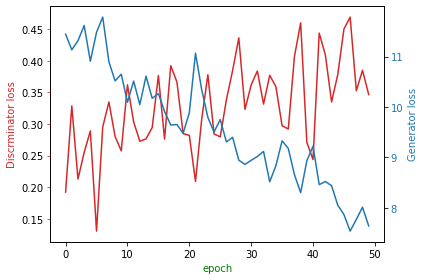

In [10]:
#training model
EPOCHS = 50

text_file = open("{}_loss-patchgan-d-g.txt".format(display_time(7)), "a")

data_dir ='./dataset/'

trainTransforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainDataset = ImageFolder(os.path.join(data_dir,'train'), transform = trainTransforms)
trainDataLoader = DataLoader(trainDataset, batch_size=BATCH_SIZE,shuffle=True)

trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE

print('Length train:',len(trainDataLoader.dataset))
print('BATCH_SIZE',BATCH_SIZE)
print('trainSteps:',trainSteps)
  
d_losses=[]
g_losses=[]

print('\nBegin trainning ...\n')
startTime = time.time()

for e in range(0,EPOCHS):
    print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))   
    epochLossG = 0
    epochLossD = 0
    
    for image, _ in tqdm(trainDataLoader):  

        im_width =  image.shape[3]        
        real_input  = image[:,:, :, :im_width // 2]
        real_output = image[:,:, :, im_width // 2:]
            
        real_input = real_input.to(device)
        real_output = real_output.to(device)
                   
        #######################
        # train discriminator #
        #######################
        discOpt.zero_grad(set_to_none=True) 
        
        #fake image
        with torch.no_grad():
            fake_image = gen(real_input)
        disc_fake_hat = disc(fake_image.detach(), real_input)
        d_loss_fake = adv_criterion(disc_fake_hat, torch.zeros_like(disc_fake_hat))
        
        #real image
        disc_real_hat = disc(real_output,real_input)
        d_loss_real = adv_criterion(disc_real_hat, torch.ones_like(disc_real_hat))
        
        #gradient descent
        d_loss = 0.5 * (d_loss_real + d_loss_fake)  
        d_loss.backward(retain_graph=True)
        discOpt.step()     

        #######################
        # train Generator     #
        #######################
        genOpt.zero_grad()
        g_loss = get_gen_loss(gen,disc,real_output,real_input,adv_criterion,recon_criterion, lambda_recon)
        g_loss.backward()
        genOpt.step()

        #save loss
        epochLossD += d_loss.item()
        epochLossG += g_loss.item()
        
    avgLossD = epochLossD / trainSteps  
    avgLossG = epochLossG / trainSteps  

    d_losses.append(avgLossD)
    g_losses.append(avgLossG)
    
    # display training information to disk
    log_d_g ="\n{} Epoch {}/{}, discriminator loss: {}, generator loss: {}".format(
        display_time(7), e+1, EPOCHS, avgLossD, avgLossG)
    n = text_file.write(log_d_g)
    print(log_d_g)
    print("========================================================")
    
endTime = time.time()
date_time = display_time(7)
text_file.close()

elap = endTime - startTime

str1 = "\n\n{} Total time taken to train {} epoch: {:.2f}s ({:.2f} minutes = {:.2f} hours)".format(
    date_time,e+1,elap, elap/60,elap/3600)
str2 =  "\n{} Discriminator loss: {}, generator loss: {}".format(
    date_time,d_losses[e],g_losses[e])  
print(str1,str2)

text_file = open("loss-patchgan-stat.txt", "a")
n = text_file.write(str1)
n = text_file.write(str2)
text_file.close()

print("\n{} Discriminator loss after {} epoch: {}".format(date_time,e+1,d_losses[e]))
print("{} Generator loss after {} epoch: {}".format(date_time,e+1,g_losses[e]))

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(d_losses,color=color)
ax1.set_xlabel('epoch',color='green')
ax1.set_ylabel('Discrminator loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Generator loss', color=color)  
ax2.plot(g_losses, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

torch.save(gen, "./output/{}_patchgan_gen_{}ep.pth".format(date_time,e+1))
torch.save(disc, "./output/{}_patchgan_disc_{}ep.pth".format(date_time,e+1))

In [7]:
def show_tensor_images(image_tensor, num_images=1, size=(1, 256, 512)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_shifted = image_tensor
    image_unflat = image_shifted.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

L1 loss (of 2 sample): 0.040119536221027374


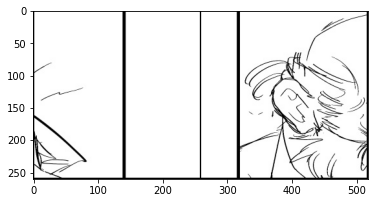

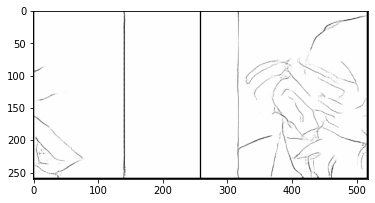

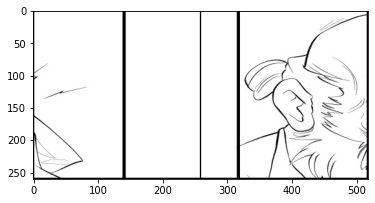

In [12]:
load_path = './output/20211216_190054_patchgan_gen_50ep.pth'

model = torch.load(load_path)
model.eval()

#lossFn = nn.MSELoss()
lossFn = nn.L1Loss()

testTransforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

n = 2

testDataset = ImageFolder(os.path.join(data_dir,'test'), transform = testTransforms)
testDataLoader = DataLoader(testDataset, batch_size = n,shuffle=False)

for image, _ in testDataLoader:      
    im_width =  image.shape[3]        
    real_input  = image[:, :, :, :im_width // 2]
    real_output = image[:, :, :, im_width // 2:]
            
    real_input = real_input.to(device)
    real_output = real_output.to(device)
    
    output = model(real_input)
    output = (output+1)/2             # change (-1,1) to (0,1)
    
    loss = lossFn(output, real_output)        
    print('L1 loss (of {} sample): {}'.format(n,loss.item()))
    
    #print('Input:')
    show_tensor_images(real_input,n,(1, 256, 256))

    #print('Output predict:')
    show_tensor_images(output,n,(1, 256, 256))
    
    #print('\nOutput real:')
    show_tensor_images(real_output,n,(1, 256, 256))
    
    #chỉ show ảnh trong batch đầu tiên
    break